# 上网业务 用户行为分析

## 导入库

In [1]:
import pandas as pd
import seaborn as sns

## 数据预处理

In [2]:
dataTwo=pd.read_excel("附件2上网业务用户满意度数据.xlsx",sheet_name='用后即评满意度分析0620(Q1655704201796)_P')
dataFour=pd.read_excel("附件4上网业务用户满意度预测数据.xlsx",sheet_name='上网')

In [3]:
dataTwo

,用户,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,办公室,高校,商业街,地铁,...,畅享套餐档位,畅享套餐名称,主套餐档位,当月MOU,近3个月平均消费（剔除通信账户支付）,近3个月平均消费（元）,本年累计消费（元）,码号资源-激活时间,码号资源-发卡时间,客户星级标识
0,用户1,8,7,7,7,-1,-1,-1,-1,-1,...,9,畅享套餐9档-语音9流量0,9,54,9.20,9.20,36.60,2020-07-17,2020-06-29,一星
1,用户2,9,9,8,9,-1,-1,-1,-1,5,...,0,0,49,172,21.00,21.00,81.49,2021-12-29,2021-12-25,未评级
2,用户3,4,3,3,3,1,2,3,4,5,...,129,畅享套餐129档-语音29新流量100,129,206,69.00,69.00,276.10,2021-11-01,2021-10-29,一星
3,用户4,9,8,8,7,-1,-1,-1,-1,5,...,0,0,49,1930,81.57,81.57,331.10,2021-08-23,2021-08-23,一星
4,用户5,10,10,10,10,1,-1,3,-1,-1,...,0,0,49,18,21.00,21.00,84.00,2021-08-02,2021-08-02,准星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,用户7016,10,10,10,10,-1,-1,-1,-1,-1,...,189,畅享套餐189档-语音189流量0,189,377,205.00,205.00,820.00,NaT,2021-09-16,三星
7016,用户7017,9,9,9,9,-1,-1,-1,-1,5,...,189,畅享套餐189档-语音189流量0,189,208,205.00,205.00,820.30,NaT,2020-05-16,三星
7017,用户7018,10,10,10,10,-1,-1,-1,-1,-1,...,189,畅享套餐189档-语音189流量0,189,444,205.00,205.00,820.00,NaT,2020-08-14,三星
7018,用户7019,5,5,5,5,1,2,-1,4,-1,...,189,畅享套餐189档-语音189流量0,189,392,205.00,205.00,820.00,NaT,2020-05-14,三星


In [4]:
dataFour

,用户id,是否遇到网络问题,居民小区,办公室,高校,商业街,地铁,农村,高铁,其他，请注明,...,当月ARPU,当月MOU,前3月ARPU,前3月MOU,外省流量占比,GPRS总流量（KB）,GPRS-国内漫游-流量（KB）,是否5G网络客户,客户星级标识,是否不限量套餐到达用户
0,1,1,1,-1,-1,-1,-1,6,7,-1,...,105.00,119,100.00,145,0.000000,2215643,0,是,银卡,否
1,2,1,-1,-1,-1,-1,-1,6,-1,-1,...,140.00,64,233.99,87,0.000000,23273941,0,否,银卡,否
2,3,2,-1,-1,-1,-1,-1,-1,-1,-1,...,20.09,33,19.71,32,0.000000,2088114,0,是,三星,否
3,4,2,-1,-1,-1,-1,-1,-1,-1,-1,...,11.25,153,16.65,292,0.000269,3691155,993,否,三星,否
4,5,1,1,-1,-1,-1,-1,-1,-1,-1,...,51.00,110,41.15,31,0.000000,40765275,0,是,三星,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1606,2,-1,-1,-1,-1,-1,-1,-1,-1,...,115.00,305,115.00,260,0.000000,24118010,0,是,银卡,否
1606,1607,1,1,-1,-1,-1,-1,-1,-1,-1,...,9.00,90,9.30,25,0.000000,11553961,0,是,三星,否
1607,1608,1,1,2,-1,-1,-1,-1,-1,-1,...,9.50,197,10.50,203,0.000000,2308312,0,是,二星,否
1608,1609,1,1,-1,-1,-1,-1,-1,-1,-1,...,130.30,107,130.00,168,0.000000,11508141,0,否,银卡,否


In [5]:
list(set(list(dataTwo.columns))&set(list(dataFour.columns)))

['商业街',
 '穿越火线',
 '居民小区',
 '其他，请注明.5',
 '其他，请注明.1',
 '其他，请注明.3',
 '微信质差次数',
 '其他，请注明.2',
 '客户星级标识',
 '全部网页或APP都慢',
 '其他，请注明',
 '脱网次数',
 '今日头条',
 '全部游戏都卡顿',
 '网络信号差/没有信号',
 '梦幻诛仙',
 '阴阳师',
 '高校',
 '当月MOU',
 '是否5G网络客户',
 '欢乐斗地主',
 '看视频卡顿',
 '百度',
 '新浪微博',
 '下载速度慢',
 '火山',
 '终端品牌',
 '打开网页或APP图片慢',
 '芒果TV',
 '套外流量费（元）',
 '其他，请注明.4',
 '性别',
 '搜狐视频',
 '拼多多',
 '是否不限量套餐到达用户',
 '淘宝',
 '爱奇艺',
 '农村',
 '上网过程中网络时断时续或时快时慢',
 '全部都卡顿',
 '炉石传说',
 '梦幻西游',
 '京东',
 '和平精英',
 '上网质差次数',
 '手机支付较慢',
 '咪咕视频',
 '龙之谷',
 '高铁',
 '腾讯视频',
 '部落冲突',
 '终端品牌类型',
 '手机上网速度慢',
 '打游戏延时大',
 '手机QQ',
 '王者荣耀',
 '显示有信号上不了网',
 '优酷',
 '快手',
 '微信',
 '地铁',
 '办公室',
 '抖音',
 '套外流量（MB）']

In [6]:
dataTwo=dataTwo[['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性',
                 '居民小区','是否5G网络客户','高校',
                 '是否不限量套餐到达用户','其他，请注明.5','咪咕视频','阴阳师',
                 '手机QQ','手机上网速度慢','炉石传说','打游戏延时大',
                 '火山','显示有信号上不了网','今日头条','办公室',
                 '上网质差次数','梦幻西游','当月MOU','其他，请注明.2',
                 '客户星级标识','穿越火线','全部都卡顿','微信',
                 '全部游戏都卡顿','脱网次数','性别','套外流量费（元）',
                 '农村','搜狐视频','京东','微信质差次数',
                 '百度','套外流量（MB）','其他，请注明.1','抖音',
                 '商业街','拼多多','新浪微博','其他，请注明',
                 '和平精英','手机支付较慢','看视频卡顿','终端品牌',
                 '梦幻诛仙','部落冲突','腾讯视频','上网过程中网络时断时续或时快时慢',
                 '其他，请注明.3','地铁','打开网页或APP图片慢','快手',
                 '芒果TV','爱奇艺','龙之谷','高铁',
                 '全部网页或APP都慢','王者荣耀','淘宝','其他，请注明.4',
                 '下载速度慢','优酷','欢乐斗地主','网络信号差/没有信号']]
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,9,9,8,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,4,3,3,3,1,否,3,否,-1,-1,...,-1,7,99,-1,-1,-1,4,-1,-1,1
3,9,8,8,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10,10,10,10,1,否,3,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,-1,是,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7016,9,9,9,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
7017,10,10,10,10,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7018,5,5,5,5,1,否,-1,否,-1,-1,...,-1,7,-1,-1,3,-1,4,-1,-1,1


In [7]:
dataFour=dataFour[['居民小区','是否5G网络客户','高校',
                   '是否不限量套餐到达用户','其他，请注明.5','咪咕视频','阴阳师',
                   '手机QQ','手机上网速度慢','炉石传说','打游戏延时大',
                   '火山','显示有信号上不了网','今日头条','办公室',
                   '上网质差次数','梦幻西游','当月MOU','其他，请注明.2',
                   '客户星级标识','穿越火线','全部都卡顿','微信',
                   '全部游戏都卡顿','脱网次数','性别','套外流量费（元）',
                   '农村','搜狐视频','京东','微信质差次数',
                   '百度','套外流量（MB）','其他，请注明.1','抖音',
                   '商业街','拼多多','新浪微博','其他，请注明',
                   '和平精英','手机支付较慢','看视频卡顿','终端品牌',
                   '梦幻诛仙','部落冲突','腾讯视频','上网过程中网络时断时续或时快时慢',
                   '其他，请注明.3','地铁','打开网页或APP图片慢','快手',
                   '芒果TV','爱奇艺','龙之谷','高铁',
                   '全部网页或APP都慢','王者荣耀','淘宝','其他，请注明.4',
                   '下载速度慢','优酷','欢乐斗地主','网络信号差/没有信号']]
dataFour

,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,阴阳师,手机QQ,手机上网速度慢,炉石传说,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,7,-1,-1,3,-1,-1,-1,-1,-1
1,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,-1,-1,3,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,-1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1606,1,是,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1607,1,是,-1,否,-1,-1,-1,-1,4,-1,...,-1,-1,99,-1,-1,-1,-1,-1,-1,1
1608,1,否,-1,否,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [8]:
dataTwo=dataTwo.fillna(0)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,9,9,8,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,4,3,3,3,1,否,3,否,-1,-1,...,-1,7,99,-1,-1,-1,4,-1,-1,1
3,9,8,8,7,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10,10,10,10,1,否,3,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,-1,是,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7016,9,9,9,9,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
7017,10,10,10,10,-1,否,-1,否,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7018,5,5,5,5,1,否,-1,否,-1,-1,...,-1,7,-1,-1,3,-1,4,-1,-1,1


In [9]:
dataTwo.replace({'居民小区':{-1:0},
                 '是否5G网络客户':{'否':0,'是':1},
                 '高校':{-1:0,3:1},
                 '是否不限量套餐到达用户':{'否':0,'是':1},
                 '其他，请注明.5':{-1:0,98:1},
                 '咪咕视频':{-1:0,9:1},
                 '阴阳师':{-1:0,10:1},
                 '手机QQ':{-1:0,2:1},
                 '手机上网速度慢':{-1:0,4:1},
                 '炉石传说':{-1:0,9:1},
                 '打游戏延时大':{-1:0,2:1},
                 '火山':{-1:0,8:1},
                 '显示有信号上不了网':{-1:0,2:1},
                 '今日头条':{-1:0,6:1},
                 '办公室':{-1:0,2:1},
                 '梦幻西游':{-1:0,4:1},
                 '其他，请注明.2':{-1:0,98:1},
                 '客户星级标识':{'未评级':0,'准星':1,'一星':2,'二星':3,'三星':4,'银卡':5,'金卡':6,'白金卡':7,'钻石卡':8},
                 '穿越火线':{-1:0,3:1},
                 '全部都卡顿':{-1:0,99:1},
                 '微信':{-1:0},
                 '全部游戏都卡顿':{-1:0,99:1},
                 '性别':{'男':1,'女':-1,'性别不详':0},
                 '农村':{-1:0,6:1},
                 '搜狐视频':{-1:0,5:1},
                 '京东':{-1:0,4:1},
                 '百度':{-1:0,5:1},
                 '其他，请注明.1':{-1:0,98:1},
                 '抖音':{-1:0,6:1},
                 '商业街':{-1:0,4:1},
                 '拼多多':{-1:0,8:1},
                 '新浪微博':{-1:0,7:1},
                 '其他，请注明':{-1:0,98:1},
                 '和平精英':{-1:0},
                 '手机支付较慢':{-1:0,5:1},
                 '看视频卡顿':{-1:0},
                 '梦幻诛仙':{-1:0,6:1},
                 '部落冲突':{-1:0,8:1},
                 '腾讯视频':{-1:0,3:1},
                 '上网过程中网络时断时续或时快时慢':{-1:0,3:1},
                 '其他，请注明.3':{-1:0,98:1},
                 '地铁':{-1:0,5:1},
                 '打开网页或APP图片慢':{-1:0,3:1},
                 '快手':{-1:0,7:1},
                 '芒果TV':{-1:0,4:1},
                 '爱奇艺':{-1:0},
                 '龙之谷':{-1:0,5:1},
                 '高铁':{-1:0,7:1},
                 '全部网页或APP都慢':{-1:0,99:1},
                 '王者荣耀':{-1:0,2:1},
                 '淘宝':{-1:0,3:1},
                 '其他，请注明.4':{-1:0,98:1},
                 '下载速度慢':{-1:0,4:1},
                 '优酷':{-1:0,2:1},
                 '欢乐斗地主':{-1:0,7:1},
                 '网络信号差/没有信号':{-1:0},
                 '终端品牌':{'0':0,'苹果':1,'华为':2,'小米科技':3,
                            '步步高':4,'欧珀':5,'realme':6,'三星':7,
                            '万普拉斯':8,'黑鲨':9,'锤子':10,'摩托罗拉':11,
                            '中邮通信':12,'万普':13,'诺基亚':14,'联通':15,
                            '中国移动':16,'中兴':17,'华硕':18,'联想':19,
                            '魅族':20,'奇酷':21,'TD':22,'北京珠穆朗玛移动通信有限公司':23,
                            '飞利浦':24,'捷开通讯科技':25,'金立':26,'酷比':27,
                            '欧博信':28,'索尼爱立信':29,'维图':30,'甄十信息科技（上海）有限公司':31,
                            '中国电信':32}
                 }, inplace=True)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,8,7,7,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,9,8,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,3,3,3,1,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,9,8,8,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,10,10,10,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,10,10,10,10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7017,10,10,10,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,5,5,5,5,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [10]:
import sklearn.preprocessing as sp
le=sp.LabelEncoder()

OverallSatisfactionMobileInternetAccess=le.fit_transform(dataTwo['手机上网整体满意度'])
NetworkCoverageSignalStrength=le.fit_transform(dataTwo['网络覆盖与信号强度'])
MobileInternetAccessSpeed=le.fit_transform(dataTwo['手机上网速度'])
MobileInternetAccessStability=le.fit_transform(dataTwo['手机上网稳定性'])

dataTwo["手机上网整体满意度"]=pd.DataFrame(OverallSatisfactionMobileInternetAccess)
dataTwo["网络覆盖与信号强度"]=pd.DataFrame(NetworkCoverageSignalStrength)
dataTwo["手机上网速度"]=pd.DataFrame(MobileInternetAccessSpeed)
dataTwo["手机上网稳定性"]=pd.DataFrame(MobileInternetAccessStability)

dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,龙之谷,高铁,全部网页或APP都慢,王者荣耀,淘宝,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2,2,2,1,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [11]:
dataTwo['出现问题场所或应用总']=dataTwo.loc[:,~dataTwo.columns.isin(['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性',
                            '是否5G网络客户','是否不限量套餐到达用户','手机上网速度慢','打游戏延时大',
                            '显示有信号上不了网','上网质差次数','当月MOU','客户星级标识',
                            '全部都卡顿','全部游戏都卡顿','脱网次数','性别',
                            '套外流量费（元）','微信质差次数','百度','套外流量（MB）',
                            '手机支付较慢','看视频卡顿','终端品牌','上网过程中网络时断时续或时快时慢',
                            '打开网页或APP图片慢','全部网页或APP都慢','下载速度慢','网络信号差/没有信号'])].apply(lambda x1:x1.sum(), axis=1)
dataTwo['网络卡速度慢延时大上不了网总']=dataTwo.loc[:,['手机上网速度慢','打游戏延时大','显示有信号上不了网','全部都卡顿',
                                                '全部游戏都卡顿','手机支付较慢','看视频卡顿','上网过程中网络时断时续或时快时慢',
                                                '打开网页或APP图片慢','全部网页或APP都慢',
                                                '下载速度慢','网络信号差/没有信号']].apply(lambda x1:x1.sum(), axis=1)
dataTwo['质差总']=dataTwo.loc[:,['微信质差次数','上网质差次数']].apply(lambda x1:x1.sum(), axis=1)
dataTwo['地点总']=dataTwo.loc[:,['居民小区','高校','办公室','农村','商业街','地铁','高铁']].apply(lambda x1:x1.sum(),axis=1)
dataTwo['整体评分']=dataTwo.loc[:,['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性']].apply(lambda x1:round(x1.mean()),axis=1)
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总,地点总,整体评分
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,6
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,1,2,7,0.0,1,8
2,3,2,2,2,1,0,1,0,0,0,...,0,1,0,0,1,7,5,0.0,7,2
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,1,1,15.0,1,7
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,1,2,2,3.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5.0,0,9
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,1,2,2,0.0,2,8
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,9
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,0,1,8,6,1.0,4,4


## 用户行为分析

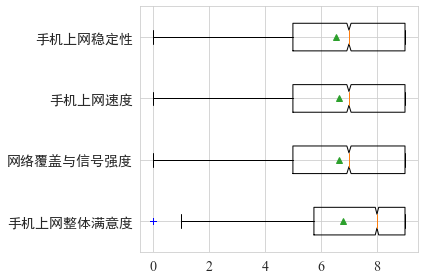

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

box_data = dataTwo[['手机上网整体满意度',
                    '网络覆盖与信号强度',
                    '手机上网速度',
                    '手机上网稳定性',]]
plt.grid(True)
plt.boxplot(box_data,
            notch = True,
            sym = "b+",
            vert = False,
            showmeans = True,
            labels = ['手机上网整体满意度',
                      '网络覆盖与信号强度',
                      '手机上网速度',
                      '手机上网稳定性',])
plt.yticks(size=14)
plt.xticks(size=14, font='Times New Roman')
plt.tight_layout()
plt.savefig('figuresTwo\\[附件2][手机上网整体满意度、网络覆盖与信号强度、手机上网速度、手机上网稳定性]评分箱线图.pdf')

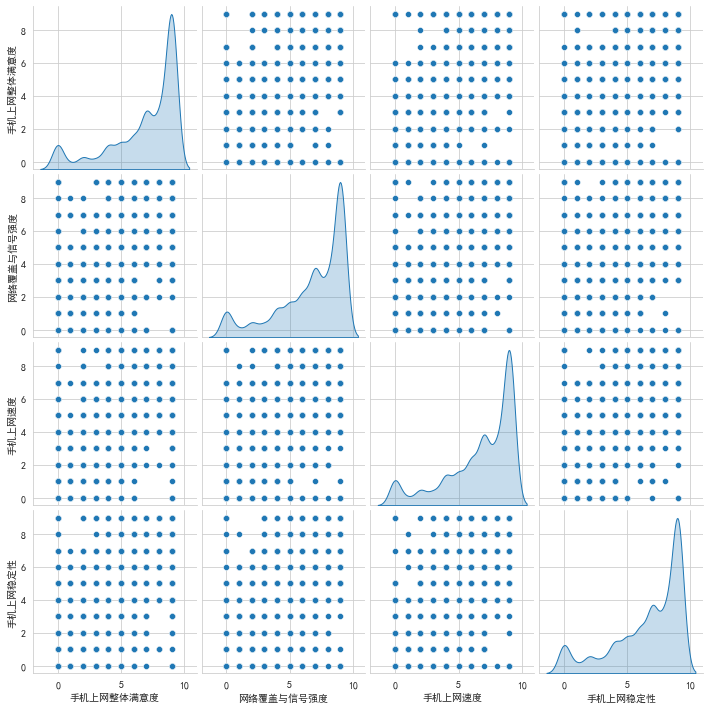

In [13]:
sns.pairplot(dataTwo[['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性']],kind='scatter',diag_kind='kde')
plt.savefig('figuresTwo\\[附件2][手机上网整体满意度、网络覆盖与信号强度、手机上网速度、手机上网稳定性]评分联合分布图.pdf',bbox_inches='tight')

## 划分高分组和低分组

In [14]:
dataTwoHigh = dataTwo[(dataTwo['手机上网整体满意度']>=7)&(dataTwo['网络覆盖与信号强度']>=7)&(dataTwo['手机上网速度']>=7)&(dataTwo['手机上网稳定性']>=7)]
dataTwoLow = dataTwo[(dataTwo['手机上网整体满意度']<=4)&(dataTwo['网络覆盖与信号强度']<=4)&(dataTwo['手机上网速度']<=4)&(dataTwo['手机上网稳定性']<=4)]

In [15]:
dataTwoHigh.describe()

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总,地点总,整体评分
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,...,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,8.603381,8.489727,8.480364,8.473082,0.213524,0.449155,0.013784,0.124577,0.004421,0.007022,...,0.002081,0.063979,0.015085,0.004941,0.252016,1.221066,1.171651,1.012224,0.751105,8.514694
std,0.677833,0.759067,0.759910,0.764806,0.409848,0.497473,0.116609,0.330282,0.066355,0.083514,...,0.045572,0.244748,0.121905,0.070131,0.434227,2.222420,1.976627,4.184122,1.138761,0.678267
min,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,9.000000,9.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,9.000000,9.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,9.000000
max,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,12.000000,106.000000,7.000000,9.000000


In [16]:
dataTwoLow.describe()

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总,地点总,整体评分
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.00000,1005.000000,...,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,1.693532,1.652736,1.670647,1.574129,0.688557,0.457711,0.120398,0.157214,0.01393,0.036816,...,0.012935,0.340299,0.117413,0.029851,0.795025,5.120398,5.162189,1.748259,2.629851,1.651741
std,1.638557,1.579817,1.569754,1.563951,0.463314,0.498457,0.325588,0.364184,0.11726,0.188403,...,0.113052,0.474045,0.322072,0.170260,0.403884,4.509224,3.168659,5.144071,1.758957,1.474251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,5.000000,0.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,7.000000,8.000000,1.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,12.000000,68.000000,7.000000,4.000000


## 特征分析

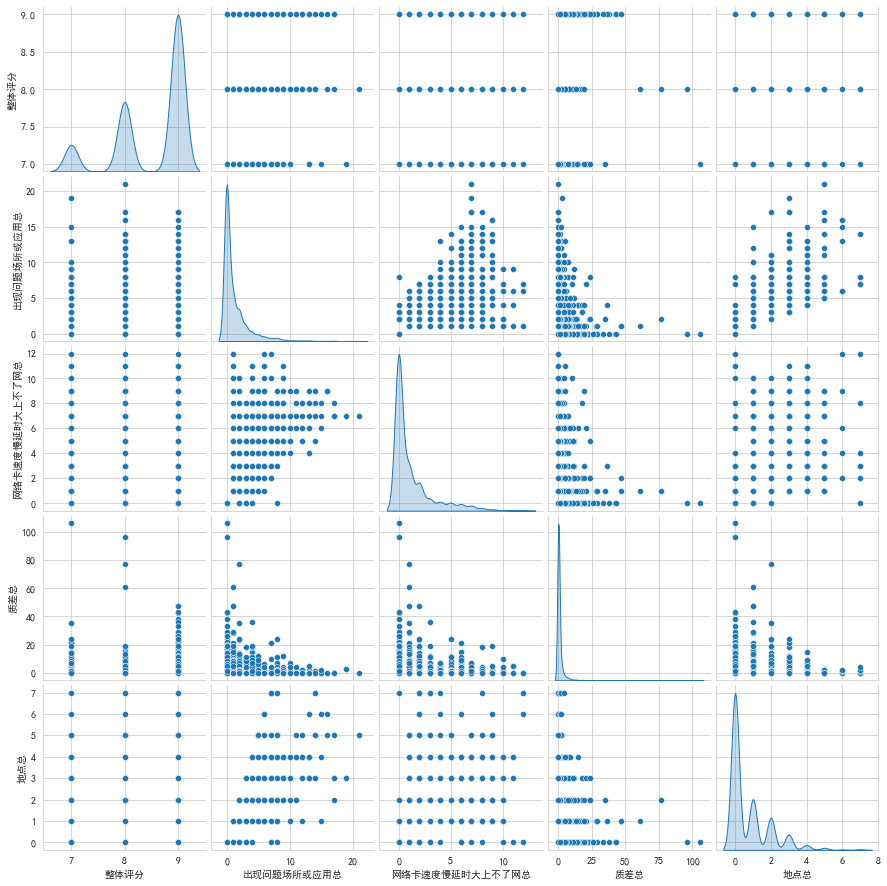

In [17]:
sns.pairplot(dataTwoHigh[['整体评分','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总','地点总']],kind='scatter',diag_kind='kde')
plt.savefig('figuresTwo\\[附件2]高分组[出现问题场所或应用总、网络卡速度慢延时大上不了网总、质差总、地点总]评分多变量联合分布图.pdf',bbox_inches='tight')

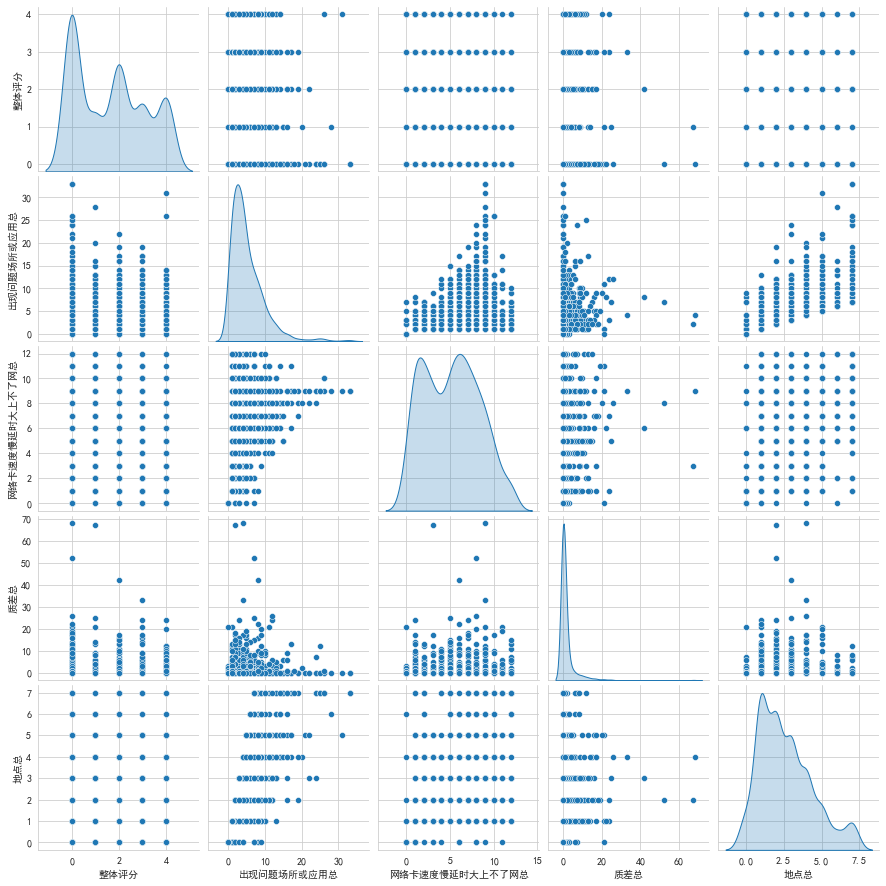

In [18]:
sns.pairplot(dataTwoLow[['整体评分','出现问题场所或应用总','网络卡速度慢延时大上不了网总','质差总','地点总']],kind='scatter',diag_kind='kde')
plt.savefig('figuresTwo\\[附件2]低分组[出现问题场所或应用总、网络卡速度慢延时大上不了网总、质差总、地点总]评分多变量联合分布图.pdf',bbox_inches='tight')

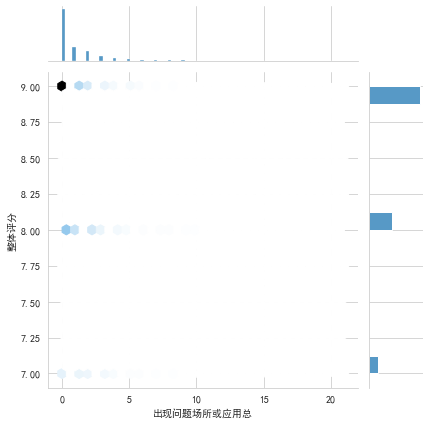

In [19]:
sns.jointplot(x='出现问题场所或应用总', y='整体评分', data=dataTwoHigh, kind='hex')
plt.savefig('figuresTwo\\[附件2]高分组出现问题场所或应用总分布.pdf',bbox_inches='tight')

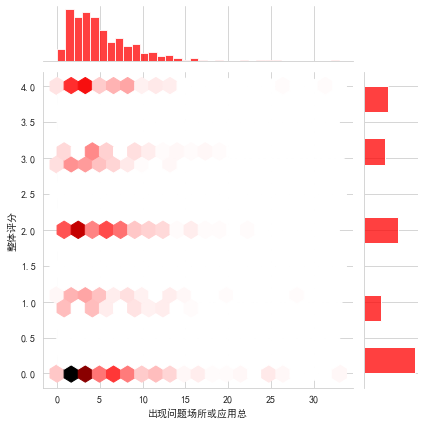

In [20]:
sns.jointplot(x='出现问题场所或应用总', y='整体评分', data=dataTwoLow, kind='hex',color='r')
plt.savefig('figuresTwo\\[附件2]低分组出现问题场所或应用总分布.pdf',bbox_inches='tight')

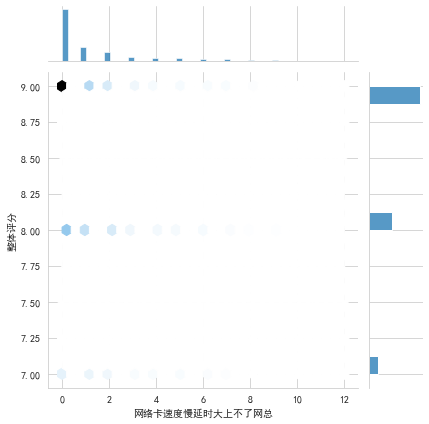

In [21]:
sns.jointplot(x='网络卡速度慢延时大上不了网总', y='整体评分', data=dataTwoHigh, kind='hex')
plt.savefig('figuresTwo\\[附件2]高分组网络卡速度慢延时大上不了网总分布.pdf',bbox_inches='tight')

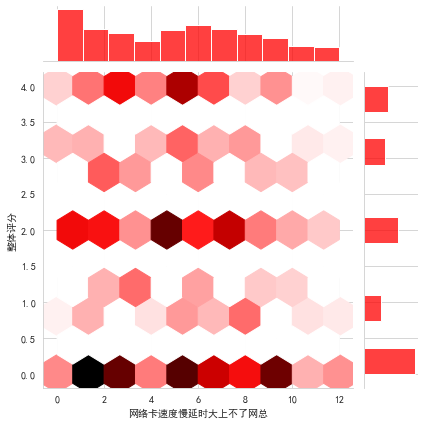

In [22]:
sns.jointplot(x='网络卡速度慢延时大上不了网总', y='整体评分', data=dataTwoLow, kind='hex',color='r')
plt.savefig('figuresTwo\\[附件2]低分组网络卡速度慢延时大上不了网总分布.pdf',bbox_inches='tight')

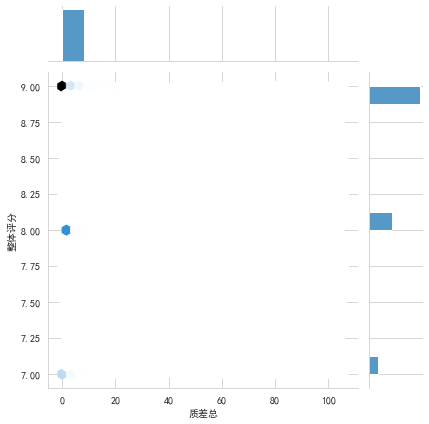

In [23]:
sns.jointplot(x='质差总', y='整体评分', data=dataTwoHigh, kind='hex')
plt.savefig('figuresTwo\\[附件2]高分组质差总分布.pdf',bbox_inches='tight')

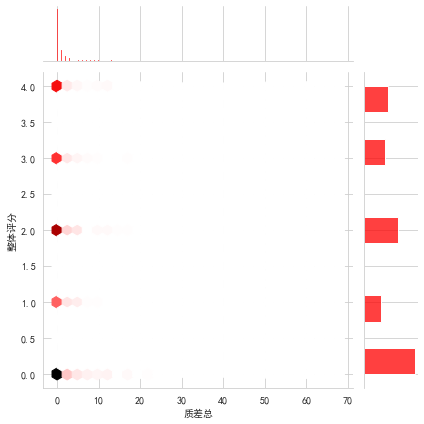

In [24]:
sns.jointplot(x='质差总', y='整体评分', data=dataTwoLow, kind='hex',color='r')
plt.savefig('figuresTwo\\[附件2]低分组质差总分布.pdf',bbox_inches='tight')

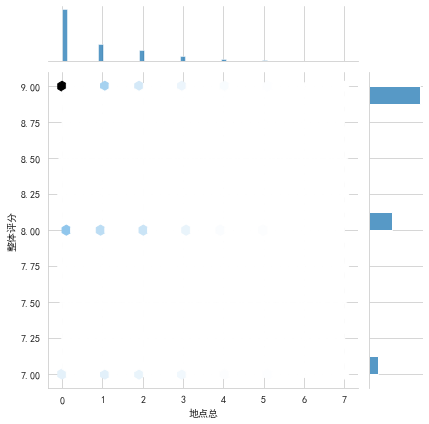

In [25]:
sns.jointplot(x='地点总', y='整体评分', data=dataTwoHigh, kind='hex')
plt.savefig('figuresTwo\\[附件2]高分组地点总分布.pdf',bbox_inches='tight')

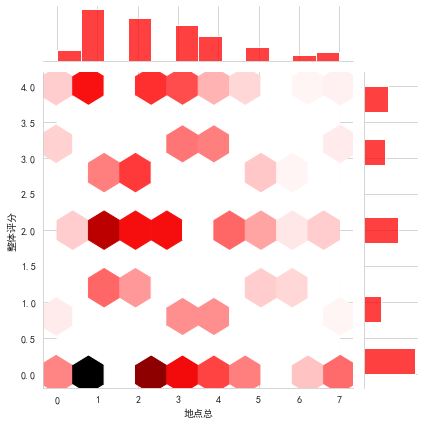

In [26]:
sns.jointplot(x='地点总', y='整体评分', data=dataTwoLow, kind='hex',color='r')
plt.savefig('figuresTwo\\[附件2]低分组地点总分布.pdf',bbox_inches='tight')

In [27]:
dataTwoHigh['终端品牌'].mode()

0    2
Name: 终端品牌, dtype: int64

In [28]:
dataTwoLow['终端品牌'].mode()

0    1
Name: 终端品牌, dtype: int64

## 异常用户评分数据剔除

In [29]:
dataTwoSample=dataTwo[((dataTwo['其他，请注明']==1)|(dataTwo['其他，请注明.1']==1)|(dataTwo['其他，请注明.2']==1)|(dataTwo['其他，请注明.3']==1)|(dataTwo['其他，请注明.4']==1)|(dataTwo['其他，请注明.5']==1))|((abs(dataTwo['手机上网整体满意度']-dataTwo['网络覆盖与信号强度'])<=5)&(abs(dataTwo['手机上网整体满意度']-dataTwo['手机上网速度'])<=4)&(abs(dataTwo['手机上网整体满意度']-dataTwo['手机上网稳定性'])<=4)&(dataTwo['网络覆盖与信号强度']-dataTwo['手机上网速度']<=4)&(dataTwo['网络覆盖与信号强度']-dataTwo['手机上网稳定性']<=4)&(dataTwo['手机上网速度']-dataTwo['手机上网稳定性']<=3))]
dataTwoSample

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总,地点总,整体评分
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,6
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,1,2,7,0.0,1,8
2,3,2,2,2,1,0,1,0,0,0,...,0,1,0,0,1,7,5,0.0,7,2
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,1,1,15.0,1,7
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,1,2,2,3.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5.0,0,9
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,1,2,2,0.0,2,8
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,9
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,0,1,8,6,1.0,4,4


In [30]:
dataTwo

,手机上网整体满意度,网络覆盖与信号强度,手机上网速度,手机上网稳定性,居民小区,是否5G网络客户,高校,是否不限量套餐到达用户,其他，请注明.5,咪咕视频,...,其他，请注明.4,下载速度慢,优酷,欢乐斗地主,网络信号差/没有信号,出现问题场所或应用总,网络卡速度慢延时大上不了网总,质差总,地点总,整体评分
0,7,6,6,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,6
1,8,8,7,8,0,0,0,0,0,0,...,0,0,0,0,1,2,7,0.0,1,8
2,3,2,2,2,1,0,1,0,0,0,...,0,1,0,0,1,7,5,0.0,7,2
3,8,7,7,6,0,0,0,0,0,0,...,0,0,0,0,0,1,1,15.0,1,7
4,9,9,9,9,1,0,1,0,0,0,...,0,0,0,0,1,2,2,3.0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,9,9,9,9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5.0,0,9
7016,8,8,8,8,0,0,0,0,0,0,...,0,0,0,0,1,2,2,0.0,2,8
7017,9,9,9,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,0,9
7018,4,4,4,4,1,0,0,0,0,0,...,0,1,0,0,1,8,6,1.0,4,4


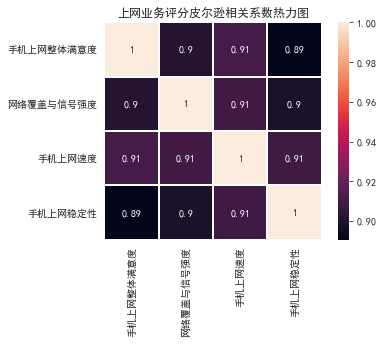

In [31]:
sns.heatmap(dataTwo[['手机上网整体满意度','网络覆盖与信号强度','手机上网速度','手机上网稳定性']].corr(method='pearson'),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
plt.title('上网业务评分皮尔逊相关系数热力图')
plt.savefig('figuresTwo\\[附件2]上网业务评分皮尔逊相关系数热力图.pdf',bbox_inches='tight')